# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv).

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv',encoding = 'latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [5]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv',encoding = 'latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

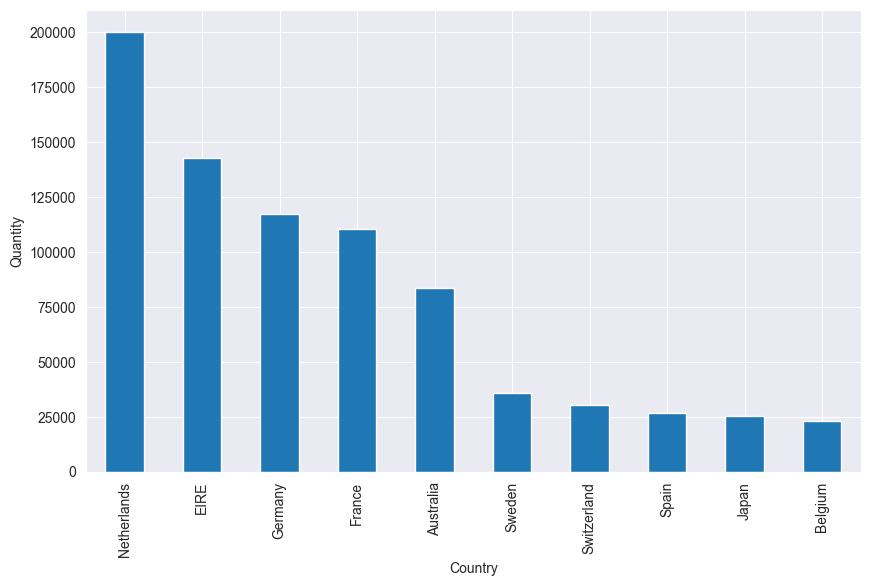

In [6]:
# Bỏ nước UK
df_filtered = df[df['Country'] != 'United Kingdom']

# Gộp nhóm, lọc lấy 10
grouped = df_filtered.groupby('Country')['Quantity'].sum().nlargest(10)

# Plot the histogram
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

### Step 5.  Exclude negative Quantity entries

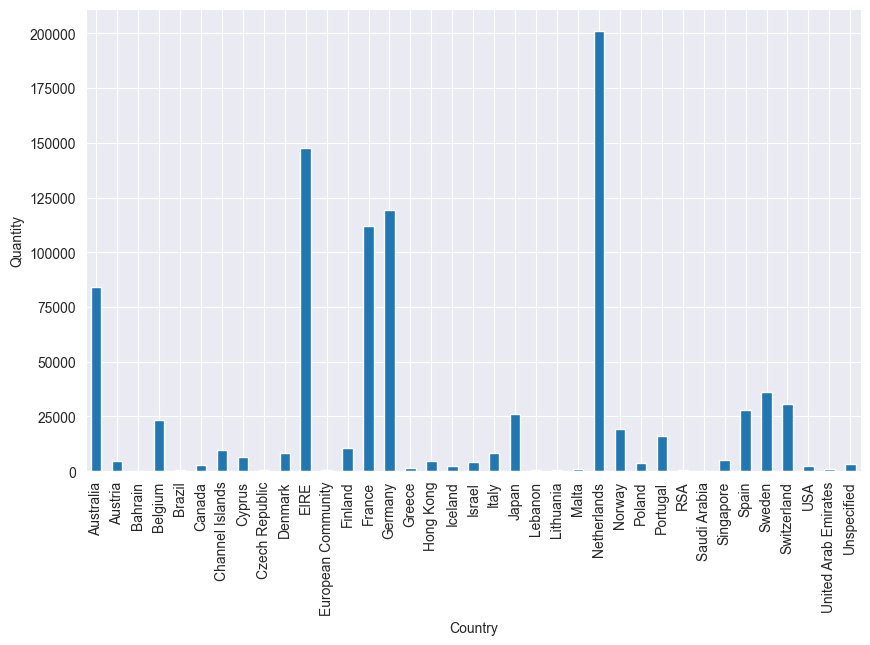

In [7]:
df_filtered = df[(df['Country'] != 'United Kingdom') & (df['Quantity'] >= 0)]

# Group the data by country and calculate the sum of Quantity
grouped = df_filtered.groupby('Country')['Quantity'].sum()

# Plot the histogram
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

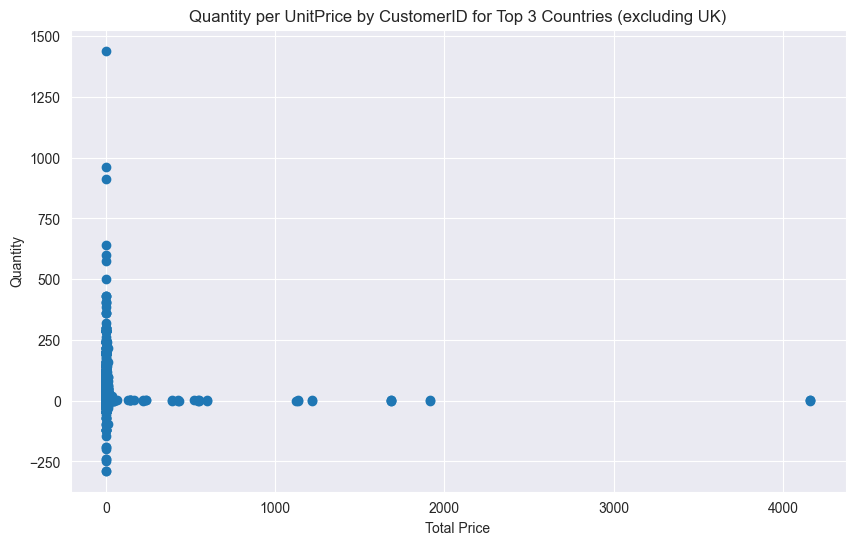

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file with Latin-1 encoding
url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv'
df = pd.read_csv(url, encoding='latin1')

# Filter the data to exclude UK and select the top 3 countries
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().nlargest(3).index.tolist()
df_filtered = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered.UnitPrice,df_filtered.Quantity)
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.title('Quantity per UnitPrice by CustomerID for Top 3 Countries (excluding UK)')
plt.show()


### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [10]:
# tạo scatter plot cho từng cặp unitprice/quanity
df.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [11]:
t1 = online_rt[online_rt.CustomerID == 12346]
t2 = online_rt[online_rt.CustomerID == 12347]
print(t1)
print(t2)

      InvoiceNo StockCode                     Description  Quantity   
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215  \
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   

         InvoiceDate  UnitPrice  CustomerID         Country  
61619  1/18/11 10:01       1.04     12346.0  United Kingdom  
61624  1/18/11 10:17       1.04     12346.0  United Kingdom  
       InvoiceNo StockCode                          Description  Quantity   
14938     537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12  \
14939     537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940     537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941     537626     22492              MINI PAINT SET VINTAGE         36   
14942     537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
...          ...       ...                                  ...       ...   
535010    581180     20719               WOODLAND CHARLOTTE B

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file with Latin-1 encoding
url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv'
df = pd.read_csv(url, encoding='latin1')

# Filter the data to exclude UK and select the top 3 countries
exclude_UK = df[(df['Country'] != 'United Kingdom') & (df['Quantity']>0)]
top_countries = exclude_UK.groupby('Country')['Quantity'].sum().nlargest(3)
df_filtered = df[df['Country'].isin(top_countries.index)]

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [13]:
df_filtered['Revenue'] = df_filtered['Quantity'] * df_filtered['UnitPrice']
df_filtered.head()

C:\Users\khamb\AppData\Local\Temp\ipykernel_10072\2136893235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Revenue'] = df_filtered['Quantity'] * df_filtered['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands,177.6
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands,15.0
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany,17.7
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany,15.3
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany,10.2


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [14]:
grouped = df_filtered.groupby('CustomerID').agg({'Revenue': 'sum', 'Quantity': 'sum'})
grouped

,Revenue,Quantity
CustomerID,,
12426.0,582.73,258
12427.0,708.37,236
12468.0,724.04,364
12471.0,18740.92,7965
12472.0,6229.48,4020
...,...,...
14016.0,4328.46,2124
14156.0,113384.14,57025
14335.0,468.26,379


##### Step 7.3.3 Plot

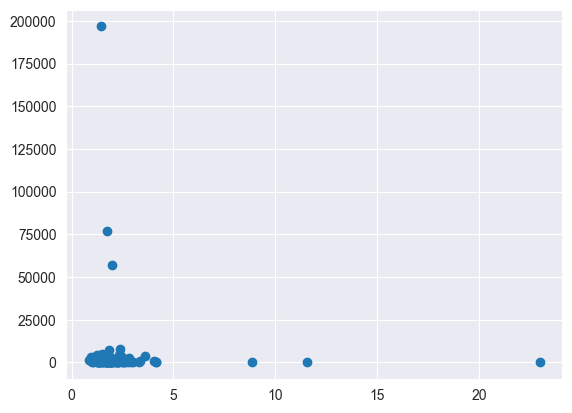

In [15]:
plt.scatter(grouped.Revenue / grouped.Quantity, grouped.Quantity )
plt.show()

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

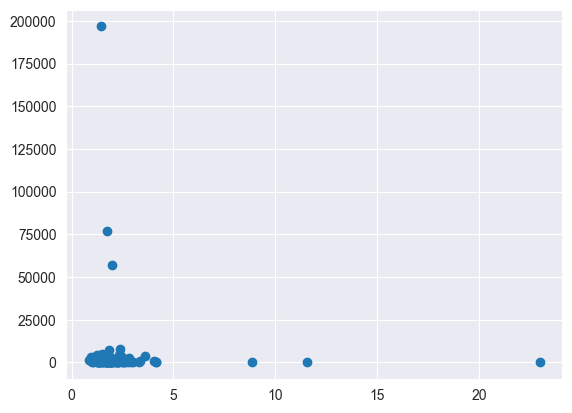

In [16]:
plt.scatter(grouped.Revenue / grouped.Quantity, grouped.Quantity )
plt.show()

##### Step 7.4.2 Zoom in so we can see that curve more clearly

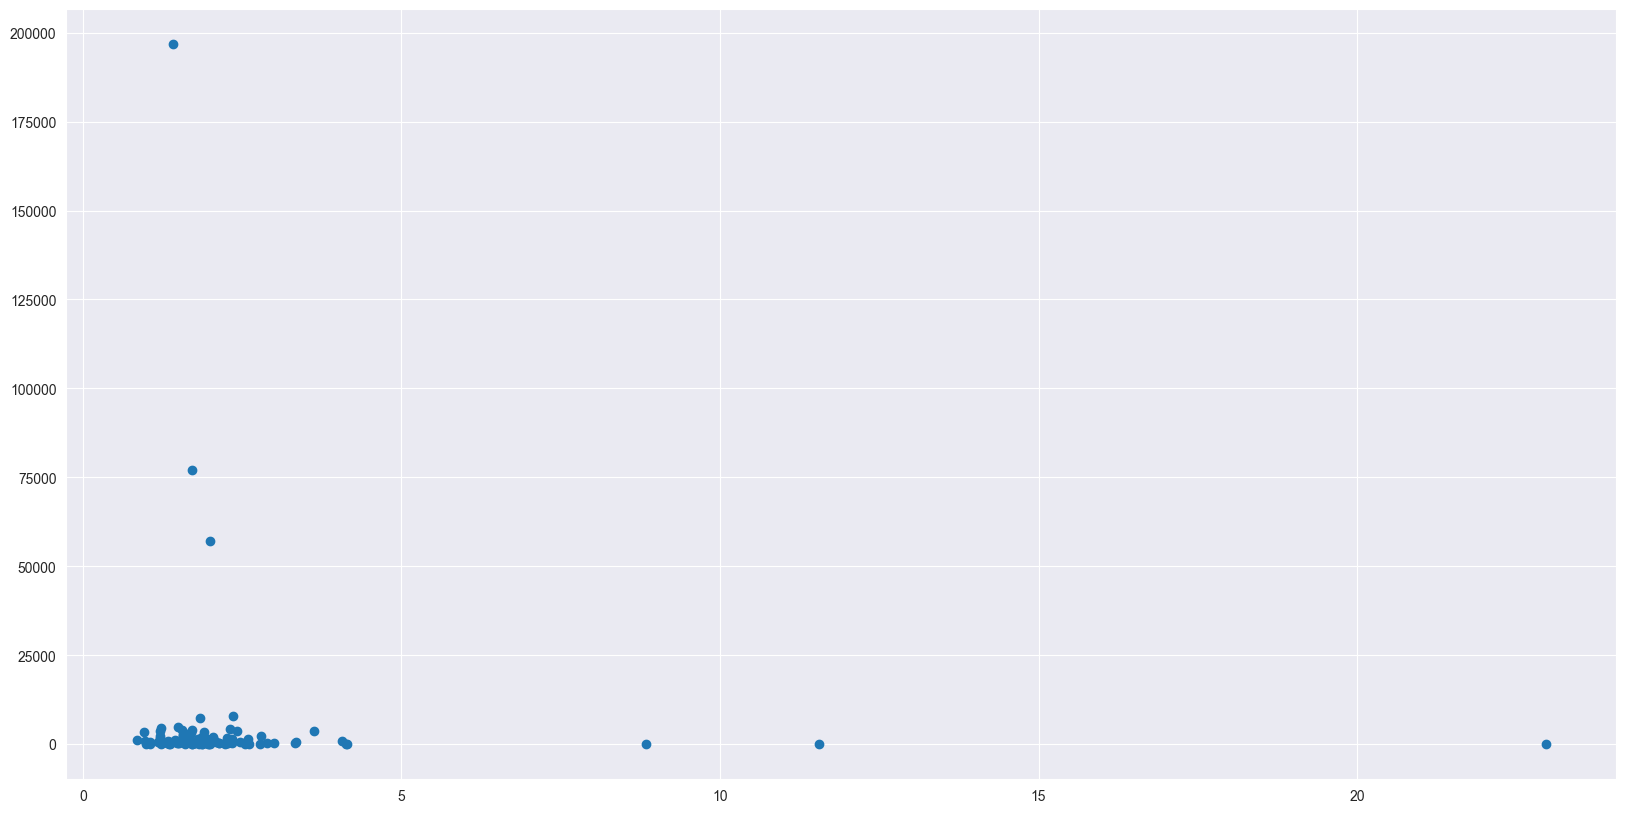

In [17]:
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(grouped.Revenue / grouped.Quantity, grouped.Quantity)
plt.show()

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file with Latin-1 encoding
url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/Online_Retail.csv'
df = pd.read_csv(url, encoding='latin1')

# Filter the data to exclude UK and select the top 3 countries
exclude_UK = df[(df['Country'] != 'United Kingdom') & (df['Quantity']>0) & (df['UnitPrice']>=0.0) & (df['UnitPrice']<50)]
top_countries = exclude_UK.groupby('Country')['Quantity'].sum().nlargest(3)
df_filtered = df[df['Country'].isin(top_countries.index)]
df_filtered['Revenue'] = df_filtered['Quantity'] * df_filtered['UnitPrice']
grouped = df_filtered.groupby('CustomerID').agg({'Revenue': 'sum', 'Quantity': 'sum'})
grouped

C:\Users\khamb\AppData\Local\Temp\ipykernel_10072\2591835827.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Revenue'] = df_filtered['Quantity'] * df_filtered['UnitPrice']


,Revenue,Quantity
CustomerID,,
12426.0,582.73,258
12427.0,708.37,236
12468.0,724.04,364
12471.0,18740.92,7965
12472.0,6229.48,4020
...,...,...
14016.0,4328.46,2124
14156.0,113384.14,57025
14335.0,468.26,379


#### 8.3 Plot.


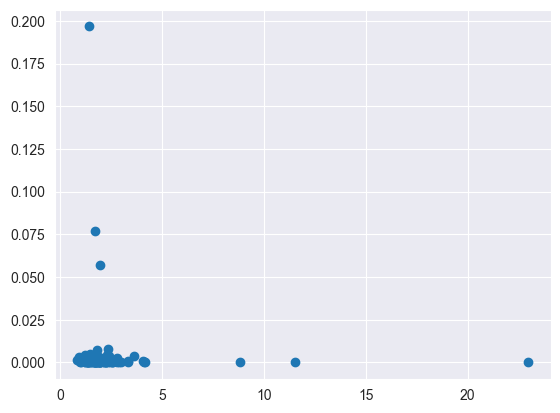

In [19]:
plt.scatter(grouped.Revenue / grouped.Quantity , grouped.Quantity/1000000)
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

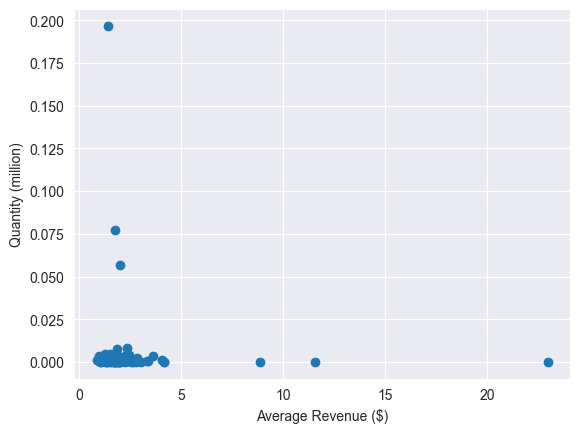

In [20]:
from matplotlib.ticker import MultipleLocator

fig,ax = plt.subplots()
ax.scatter( grouped.Revenue / grouped.Quantity , grouped.Quantity/1000000)

ax.set_xlabel('Average Revenue ($)')
ax.set_ylabel('Quantity (million)')

plt.show()

### BONUS: Create your own question and answer it.

C:\Users\khamb\AppData\Local\Temp\ipykernel_10072\64517258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Japan['Revenue'] = Japan['Quantity'] * Japan['UnitPrice']


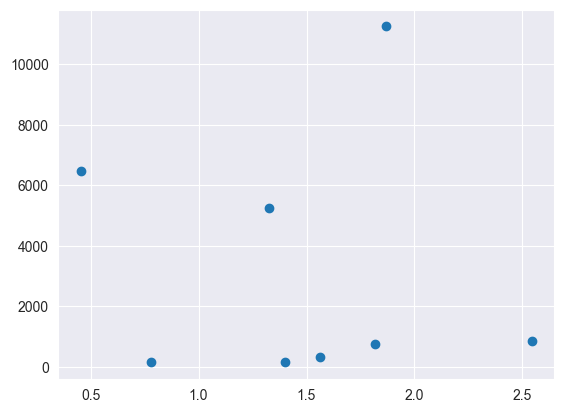

In [21]:
# Plot df (quantity per people) which country = Japan
Japan = df[df['Country'] == 'Japan']
Japan['Revenue'] = Japan['Quantity'] * Japan['UnitPrice']
grouped = Japan.groupby('CustomerID').agg({'Revenue': 'sum', 'Quantity': 'sum'})
plt.scatter(grouped.Revenue / grouped.Quantity , grouped.Quantity)
plt.show()